# 2.5 데이터 선정

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 90 (delta 23), reused 53 (delta 13), pack-reused 0
Receiving objects: 100% (90/90), 24.12 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [10]:
import pandas as pd

df = pd.read_csv("/content/DataDrivenReport/car.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [12]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [13]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
df.shape

(11914, 10)

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [16]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [17]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [18]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [19]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [20]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


In [21]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

<Axes: xlabel='Price'>

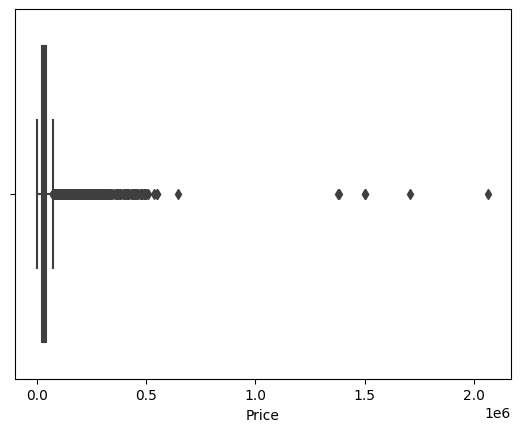

In [22]:
sns.boxplot(x=df['Price'], data=df)

<Axes: xlabel='HP'>

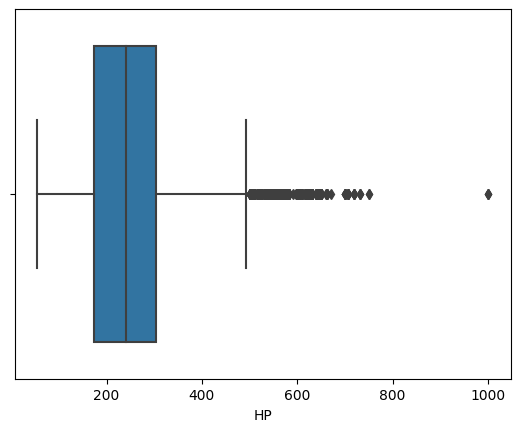

In [23]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

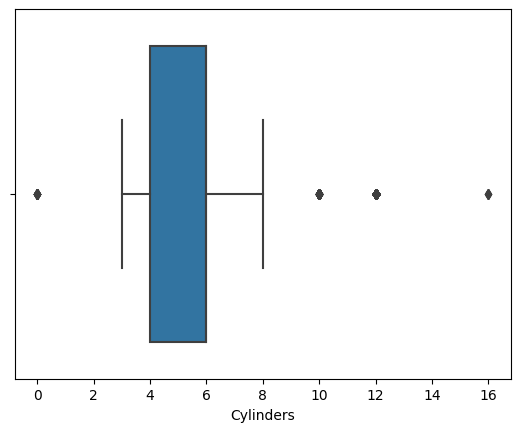

In [24]:
sns.boxplot(x=df['Cylinders'])

In [25]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)
df, IQR = df.align(IQR, axis=1)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


(9191, 10)

In [ ]:
len(df)

9191

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

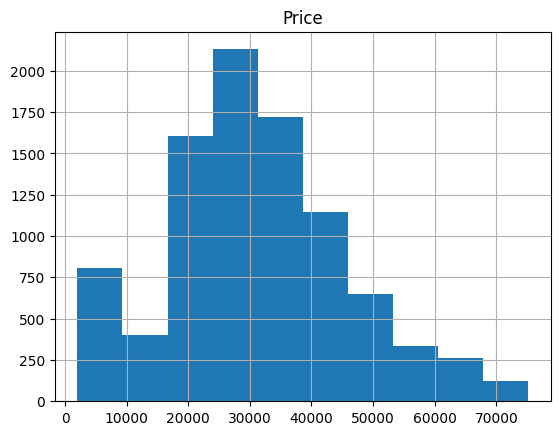

In [ ]:
df.hist(column='Price')


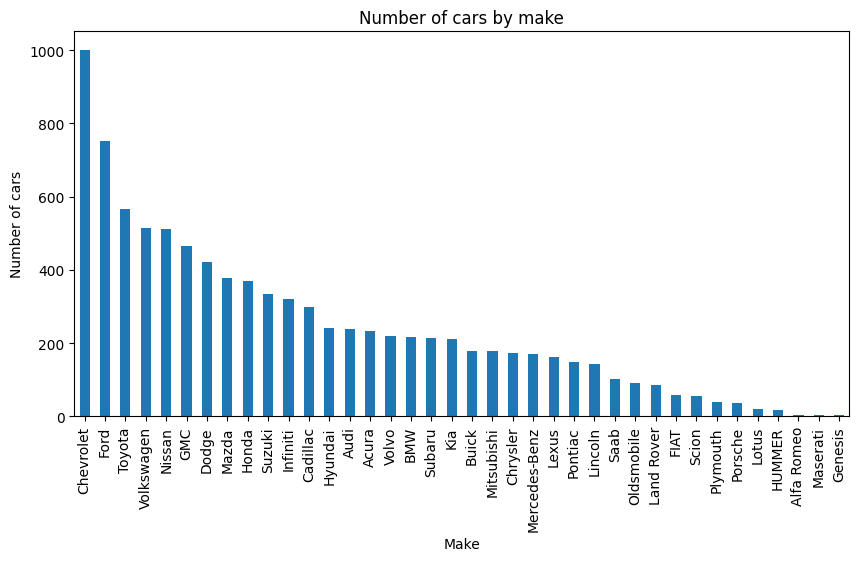

In [27]:
df['Make'].value_counts().nlargest(40).plot(kind='bar', figsize = (10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.show()

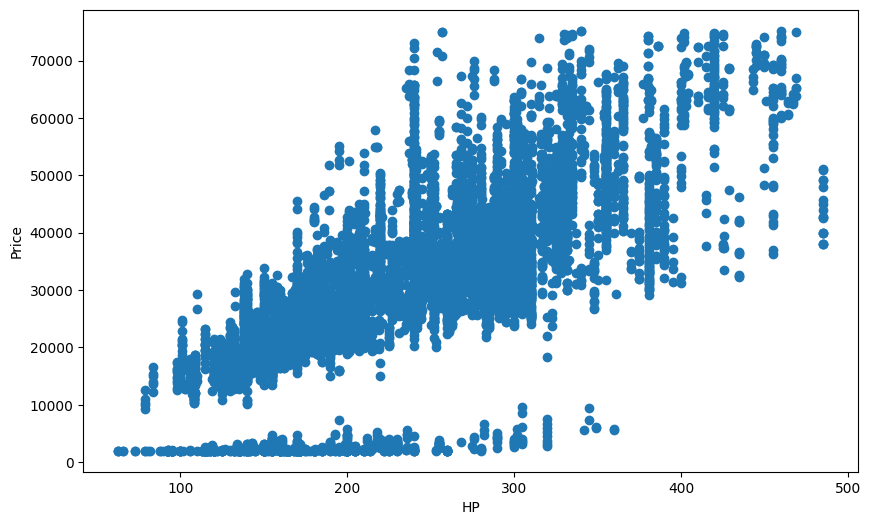

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

,Cylinders,HP,MPG-C,MPG-H,Price,Year
Cylinders,1.000000,0.715237,-0.755540,-0.703856,0.354013,-0.133920
HP,0.715237,1.000000,-0.544551,-0.443807,0.739042,0.326726
MPG-C,-0.755540,-0.544551,1.000000,0.939141,-0.180515,0.338145
MPG-H,-0.703856,-0.443807,0.939141,1.000000,-0.106320,0.378479
Price,0.354013,0.739042,-0.180515,-0.106320,1.000000,0.592983
Year,-0.133920,0.326726,0.338145,0.378479,0.592983,1.000000


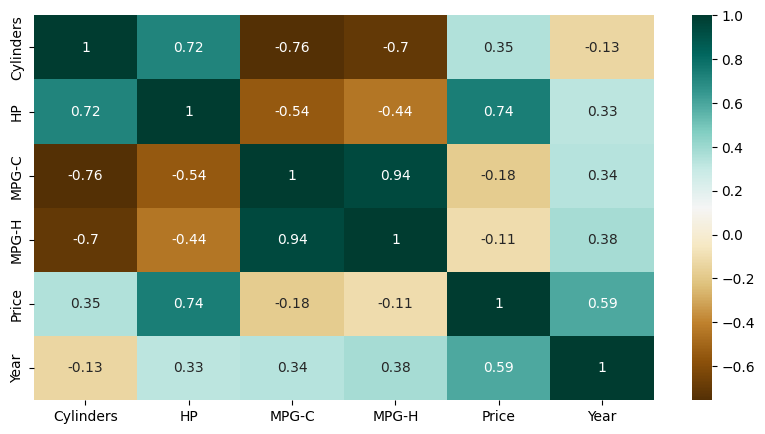

In [28]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c

# [참고] 판다스 프로파일링 라이브러리

In [32]:
!pip install ydata_profiling

In [31]:
import ydata_profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

<ipython-input-31-a6537468adf5>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
pr=ProfileReport(df)
pr.to_file('./pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2.6 분석방법 결정 및 해석/검증

## 2.6.1 기본통계

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')


In [ ]:

# Calculate descriptive statistics for each column
stats = df.describe().round(2)

# Add additional statistics for each column
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.loc['var'] = df.var().round(2)
stats.loc['skew'] = df.skew().round(2)
stats.loc['kurtosis'] = df.kurtosis().round(2)

# Print the results
print(stats)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
count           1599.00           1599.00      1599.00         1599.00   
mean               8.32              0.53         0.27            2.54   
std                1.74              0.18         0.19            1.41   
min                4.60              0.12         0.00            0.90   
25%                7.10              0.39         0.09            1.90   
50%                7.90              0.52         0.26            2.20   
75%                9.20              0.64         0.42            2.60   
max               15.90              1.58         1.00           15.50   
range             11.30              1.46         1.00           14.60   
var                3.03              0.03         0.04            1.99   
skew               0.98              0.67         0.32            4.54   
kurtosis           1.13              1.23        -0.79           28.62   

          chlorides  free sulfur diox

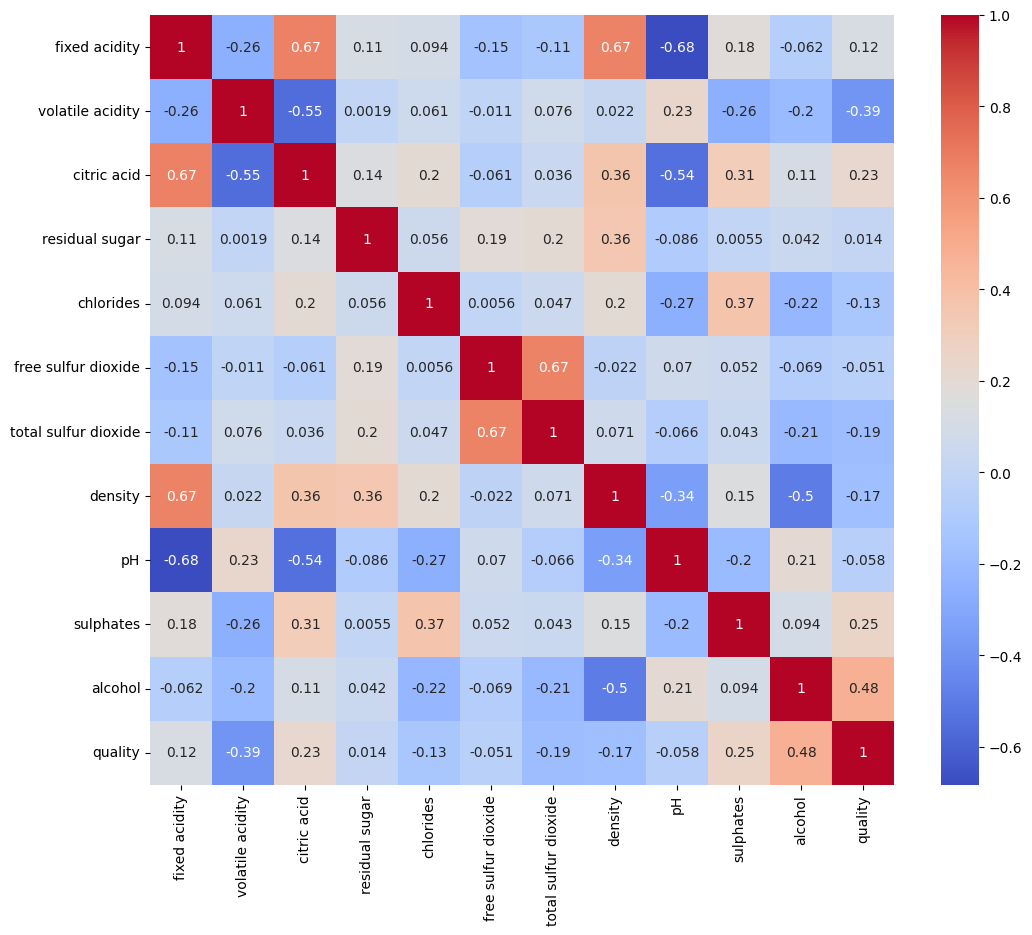

In [ ]:
# compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 2.6.2 가설검정

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

In [ ]:
heights = [165, 170, 175, 180, 165, 170, 165, 175, 170, 175, 180, 180, 165, 170, 170, 170, 175, 170, 175, 180]

In [ ]:
sample_mean = np.mean(heights)
print("Sample mean:", sample_mean)

Sample mean: 172.25


In [ ]:
t_statistic, p_value = ttest_1samp(heights, 175)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -2.3424076306982147
p-value: 0.03020119503702702


In [ ]:
import numpy as np
np.random.seed(14)
#Generate heights for Group A and Group B
group_a_heights = np.random.normal(160, 10, 30)
group_b_heights = np.random.normal(170, 8, 25)


In [ ]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_val = ttest_ind(group_a_heights,
group_b_heights)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -3.069892982872516
P-value: 0.0033731880990274534


In [33]:
import numpy as np
from scipy.stats import ttest_rel

before_scores = np.array([62, 75, 85, 79, 67, 74, 80, 60, 65, 72])
after_scores = np.array([72, 78, 91, 85, 70, 80, 88, 65, 70, 82])

t_statistic, p_value = ttest_rel(before_scores, after_scores)

print("t-statistic:", t_statistic)
print(f"p-값:{p_value:0.5f}")

t-statistic: -7.8881570460237285
p-값:0.00002


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

before = np.array([35, 65])
after = np.array([55, 45])

observed = np.array([before, after])

chi2_statistic, p_value, dof, expected = chi2_contingency(observed)

print("chi-제곱 통계:", chi2_statistic)
print("p-값:", p_value)

chi-제곱 통계: 7.292929292929292
p-값: 0.006922651100971638


In [ ]:
import scipy.stats as stats

# define the data
group_a = [10, 12, 13, 14, 15]
group_b = [12, 13, 14, 15, 16]
group_c = [14, 15, 16, 17, 18]

# perform the ANOVA test
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

# print the results
print("F statistic:", f_statistic)
print("P-value:", p_value)

F statistic: 4.5057471264367805
P-value: 0.034701307888476286


## 2.6.3 선형회귀분석

In [ ]:
import statsmodels.formula.api as smf

# Create a DataFrame with the dependent variable and independent variables
data = {'exam_score': [85, 72, 90, 65, 78, 87, 92, 80, 75, 84],
        'num_tutors': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
        'family_wealth': [50000, 75000, 100000, 30000, 50000, 70000, 100000, 80000, 60000, 90000]}
df = pd.DataFrame(data)

# Fit a multiple linear regression model
model = smf.ols('exam_score ~ num_tutors + family_wealth', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     3.972
Date:                Sat, 23 Sep 2023   Prob (F-statistic):             0.0703
Time:                        15:35:41   Log-Likelihood:                -31.235
No. Observations:                  10   AIC:                             68.47
Df Residuals:                       7   BIC:                             69.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.2891      7.903      7.881

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Fit a simple linear regression model
model = smf.ols('exam_score ~ num_tutors', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                   0.08391
Date:                Sat, 23 Sep 2023   Prob (F-statistic):              0.779
Time:                        15:35:59   Log-Likelihood:                -34.975
No. Observations:                  10   AIC:                             73.95
Df Residuals:                       8   BIC:                             74.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.9275      7.055     11.188      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 2.6.4 분류예측모델

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [ ]:
# create a dataset with two variables
np.random.seed(42)
time_studied = np.random.randint(0, 10, 1000)
avg_sleep_hours = np.random.uniform(4, 10, 1000)
passing = np.random.binomial(1, 1 / (1 + np.exp(-time_studied + 2 * avg_sleep_hours - 10)))  # sigmoid function
df = pd.DataFrame({'time_studied': time_studied, 'avg_sleep_hours': avg_sleep_hours, 'passing': passing})



In [ ]:
# split the dataset into training and testing sets
X = df[['time_studied', 'avg_sleep_hours']]
y = df['passing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# fit logistic regression models with one and two variables
model1 = LogisticRegression()
model1.fit(X_train[['time_studied']], y_train)

model2 = LogisticRegression()
model2.fit(X_train, y_train)



LogisticRegression()

In [ ]:
# predict whether a person will pass or fail based on time studied and avg_sleep_hours
y_pred1 = model1.predict(X_test[['time_studied']])
y_pred2 = model2.predict(X_test)



In [ ]:
# calculate accuracy and confusion matrix
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)


In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)


In [ ]:
# calculate ROC curve and AUC score
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test[['time_studied']])[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])

auc1 = roc_auc_score(y_test, model1.predict_proba(X_test[['time_studied']])[:, 1])
auc2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])


In [ ]:
print('Model with time studied only:')
print('Accuracy:', accuracy1)
print('Confusion Matrix:', cm1)
print('AUC:', auc1)

print('Model with time studied and avg_sleep_hours:')
print('Accuracy:', accuracy2)
print('Confusion Matrix:', cm2)
print('AUC:', auc2)

Model with time studied only:
Accuracy: 0.7266666666666667
Confusion Matrix: [[ 83  48]
 [ 34 135]]
AUC: 0.7884050770134152
Model with time studied and avg_sleep_hours:
Accuracy: 0.8933333333333333
Confusion Matrix: [[118  13]
 [ 19 150]]
AUC: 0.9595736031437735


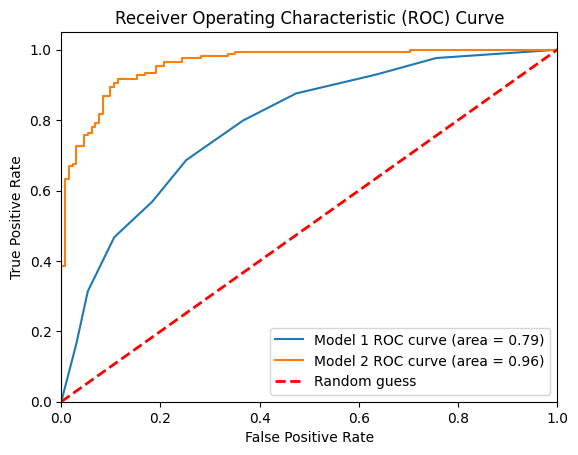

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve for the model with only "study_hours"
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)

# ROC curve for the model with "study_hours" and "sleep_hours"
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:, 1])

print('Accuracy:', accuracy)

Accuracy: 0.8933333333333333


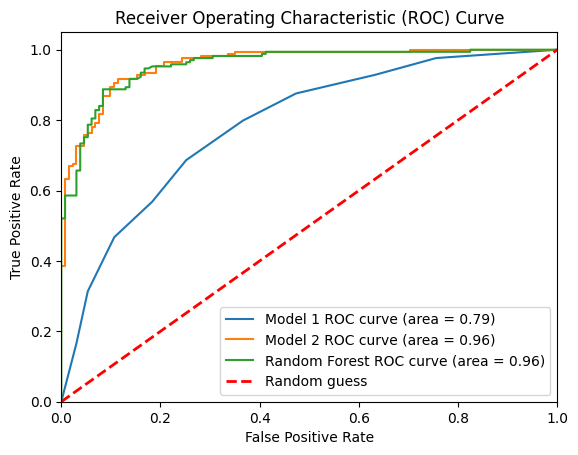

In [ ]:
# ROC curve for the model with "study_hours" and "sleep_hours" with Random Forests
roc_auc2 = auc(fpr2, tpr2)

roc_auc3 = auc(fpr3, tpr3)

plt.plot(fpr1, tpr1, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest ROC curve (area = %0.2f)' % roc_auc3)


# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()